In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
df= pd.read_csv("/content/spam.csv",encoding='ISO-8859-1')
df.head()

,ham,ZOE IT JUST HIT ME 2 IM FUCKING SHITIN MYSELF IL DEFO TRY MY HARDEST 2 CUM 2MOROW LUV U MILLIONS LEKDOG,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,&lt;#&gt; in mca. But not conform.,NaN,NaN,NaN
1,ham,&lt;#&gt; mins but i had to stop somewhere f...,NaN,NaN,NaN
2,ham,&lt;DECIMAL&gt; m but its not a common car he...,NaN,NaN,NaN
3,ham,and picking them up from various points,NaN,NaN,NaN
4,spam,call now 08707509020 Just 20p per min NTT Ltd...,NaN,NaN,NaN


# New Section

In [ ]:
columns_to_drop = ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"]
df.drop(columns=columns_to_drop, inplace=True)

In [ ]:
df.columns = ['label', 'message']

In [ ]:
df.shape

(7446, 2)

In [ ]:
df=df.drop_duplicates()
df

,label,message
0,ham,&lt;#&gt; in mca. But not conform.
1,ham,&lt;#&gt; mins but i had to stop somewhere f...
2,ham,&lt;DECIMAL&gt; m but its not a common car he...
3,ham,and picking them up from various points
4,spam,call now 08707509020 Just 20p per min NTT Ltd...
...,...,...
7441,ham,Yup... Hey then one day on fri we can ask miwa...
7442,ham,Yup... How Ì_ noe leh...
7443,ham,Yup... I havent been there before... You want ...
7444,ham,Yup... Ok i go home look at the timings then i...


In [ ]:
df.shape


(5973, 2)

In [ ]:
df.describe()

,label,message
count,5973,5973
unique,3,5973
top,ham,&lt;#&gt; in mca. But not conform.
freq,4514,1


In [ ]:
df['label'].value_counts()

ham     4514
spam    1458
v1         1
Name: label, dtype: int64

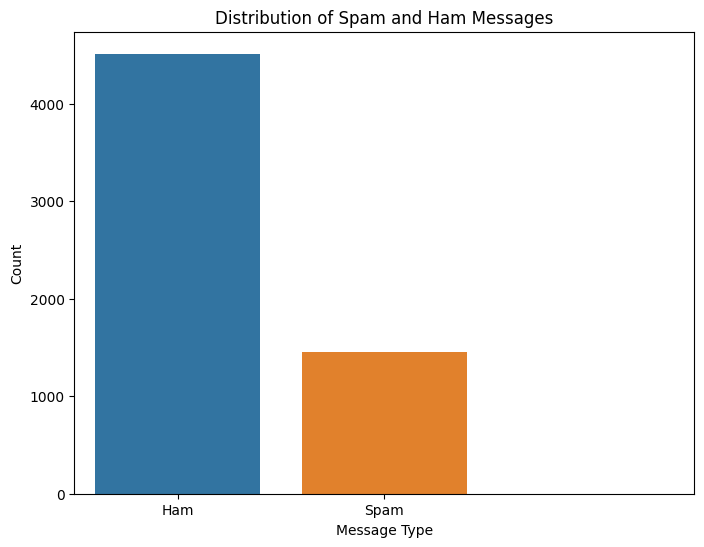

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='label')
plt.xlabel('Message Type')
plt.ylabel('Count')
plt.title('Distribution of Spam and Ham Messages')
plt.xticks([0, 1], ['Ham', 'Spam'])
plt.show()

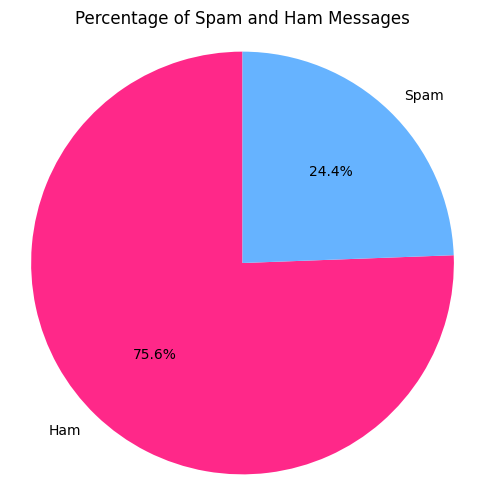

In [ ]:
spam_count = df['label'].value_counts()[1]
ham_count = df['label'].value_counts()[0]

plt.figure(figsize=(6, 6))
labels = ['Ham', 'Spam']
sizes = [ham_count, spam_count]
colors = ['#ff2889', '#66b3ff']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Spam and Ham Messages')
plt.axis('equal')
plt.show()

In [ ]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    text = text.lower()
    words = text.split()
    words = [word for word in words if word not in set(stopwords.words('english'))]
    cleaned_text = ' '.join(words)
    return cleaned_text

In [ ]:
df_1 = df.copy()
df_1['message'] = df_1['message'].apply(lambda x: preprocess_text(x))

In [ ]:
df_1['label'] = df_1['label'].map({'ham': 0, 'spam': 1})

In [ ]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5973 entries, 0 to 7445
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   label    5972 non-null   float64
 1   message  5973 non-null   object 
dtypes: float64(1), object(1)
memory usage: 140.0+ KB


In [ ]:
X = df_1['message']
y = df_1['label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
vectorizer = CountVectorizer()
X_train_counts = vectorizer.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

In [ ]:
nan_rows = pd.isna(y_train)
nan_rows_test = pd.isna(y_test)
y_train = y_train.dropna()
X_train_tfidf = X_train_tfidf[~nan_rows]
y_test = y_test.dropna()

In [ ]:
clf = MultinomialNB()
clf.fit(X_train_tfidf, y_train)

MultinomialNB()

In [ ]:
X_test_counts = vectorizer.transform(X_test)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)
X_test_tfidf = X_test_tfidf[~nan_rows_test]
y_pred = clf.predict(X_test_tfidf)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [ ]:
accuracy*100

97.65690376569037

In [ ]:
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[907   2]
 [ 26 260]]


In [ ]:
print('Classification Report:')
print(class_report)

Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98       909
         1.0       0.99      0.91      0.95       286

    accuracy                           0.98      1195
   macro avg       0.98      0.95      0.97      1195
weighted avg       0.98      0.98      0.98      1195



In [ ]:
input_mail = ["""Click this url for prize!!!"""]
input_counts = vectorizer.transform(input_mail)
input_tfidf = tfidf_transformer.transform(input_counts)
prediction = clf.predict(input_tfidf)

if prediction[0] == 0:
    result = "Legitimate mail"
else:
    result = "Spam mail"

print(f"Prediction: {result}")

Prediction: Spam mail
